# Visualizing and Understanding the Relationship between PCA, Auto encoder and K-Means Clustering



#### Presented By
#### Nikhil Jangamreddy ( 2018csm1011 )

## Introduction and Outline


### Step 1: Relation between PCA Guided K-means and K-means ( simulation )

### Step 2 : Relation between PCA and Linear Auto encoder ( proof + simulation)













## Step 1 : Relation between PCA Guided K-means and K-means

### Dataset : IMDB Movie data

### Data Dimensions : 14332 $\times$ 44 removing strings like url 14332 we get $\times$ 38

### Data Pre-processing : Fill NA values, Standardisation

In [1]:
# Loading the Libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense
from keras import regularizers, Model, optimizers
import seaborn as sns
import keras

from sklearn import datasets
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Loading the data

In [ ]:
data = pd.read_csv('imdb.csv',error_bad_lines=False);

### Data Pre-processing

In [3]:
data.head()
movie = data
str_list = []
for colname, colvalue in movie.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)           
num_list = movie.columns.difference(str_list)
movie_num = movie[num_list]
movie_num.head()
movie_num = movie_num.fillna(value=0, axis=1)
X = movie_num.values
X_std = StandardScaler().fit_transform(X)
movie_num.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,duration,imdbRating,nrOfGenre,nrOfNewsArticles,nrOfNominations,nrOfPhotos,nrOfUserReviews,nrOfWins,ratingCount,year
0,0,0,0,0,0,1,0,0,1,1,...,3240.0,8.4,3,96,0,19,85,1,40550.0,1921.0
1,0,0,1,0,0,1,0,0,0,1,...,5700.0,8.3,3,110,1,35,122,2,45319.0,1925.0
2,0,0,0,0,0,0,0,0,1,0,...,9180.0,8.4,2,428,4,67,376,3,81007.0,1927.0
3,1,0,1,0,0,1,0,0,0,0,...,6420.0,8.3,3,123,1,53,219,1,37521.0,1926.0
4,0,0,0,0,0,1,0,0,1,0,...,5220.0,8.7,3,187,0,38,186,2,70057.0,1931.0


## Finding the Eigen Values and Eigen Vectors after Calculating Covariance Matrix

### Sort the Eigen Values and Store corresponding Eigen Vectors Using Numpy package

In [4]:
# Calculating Eigenvectors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
covariance_matrix = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
print('Top 5 Eigenvalues in descending order:')
for i in eig_pairs[:5]:
    print(i[0])

Top 5 Eigenvalues in descending order:
3.757417563959593
2.2059055052727463
1.9752793363920373
1.7860731429920065
1.5733880931673736


## Problem : Number of Principal Components to Choose ?

### Solution : **Explained Variance measure**

### Idea : Explained Variance Calculates the information of Variance attributed to each of Principal Components 

### Cummulative Explained variance of k PC's can be Understood as percentage of Variance covered using K PC's


In [5]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
cum_var_exp = np.cumsum(var_exp) 

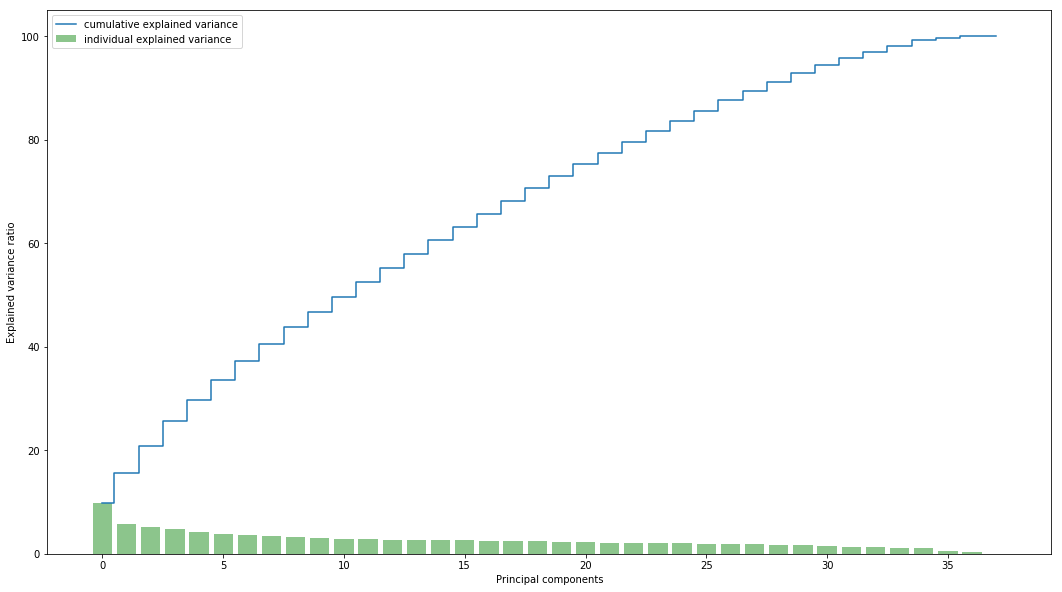

In [6]:
plt.figure(figsize=(18, 10))
plt.bar(range(38), var_exp, alpha=0.45, align='center', label='individual explained variance', color = 'g')
plt.step(range(38), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [7]:
print(cum_var_exp[27])

89.36400271832298


## Above plot explains 89.3% of Variance can be explained using 27 components.
## Running PCA using Principal 27 components

In [8]:
pca = PCA(n_components=27)
x_25d = pca.fit_transform(X_std)
x_25d.shape

(14332, 27)

##  PCA Guided K-means Clustering Vs K-means Clustering for number of clusters = 3

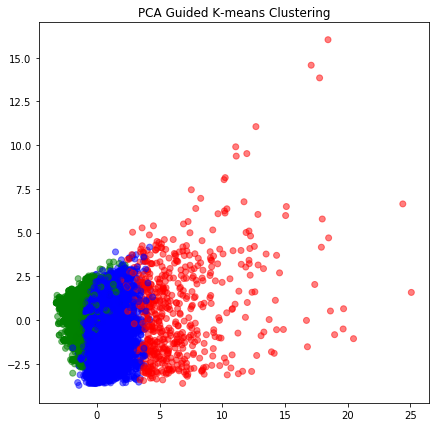

In [9]:
kmeans = KMeans(n_clusters=3)
X_clustered = kmeans.fit_predict(x_25d)
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (7,7))
plt.scatter(x_25d[:,0],x_25d[:,2], c= label_color, alpha=0.5) 
plt.title("PCA Guided K-means Clustering")
plt.show()


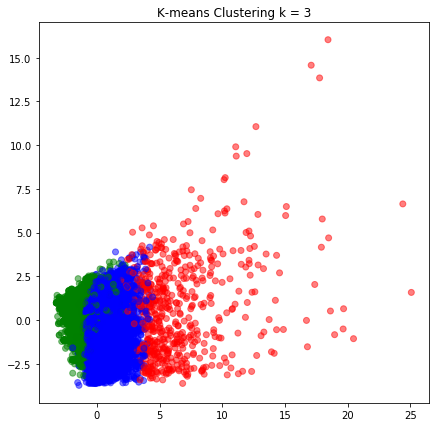

In [10]:
kmeans = KMeans(n_clusters=3)
X_clustered = kmeans.fit_predict(X_std)
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (7,7))
plt.title("K-means Clustering k = 3")
plt.scatter(x_25d[:,0],x_25d[:,2], c= label_color, alpha=0.5) 
plt.show()

### PCA guided K-means Clustering Vs K-means clustering for k =3 
![](images/3.jpeg)


##  PCA Guided K-means Clustering Vs K-means Clustering for number of clusters =4


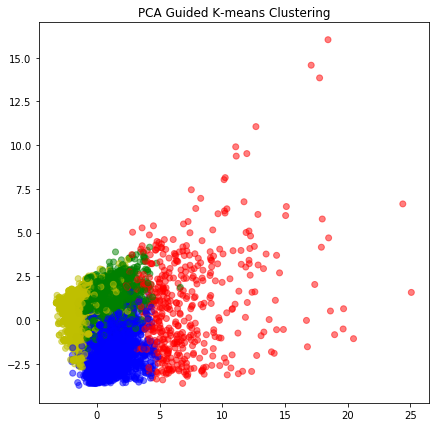

In [11]:
kmeans = KMeans(n_clusters=4)
X_clustered = kmeans.fit_predict(x_25d)
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (7,7))
plt.scatter(x_25d[:,0],x_25d[:,2], c= label_color, alpha=0.5) 
plt.title("PCA Guided K-means Clustering")
plt.show()


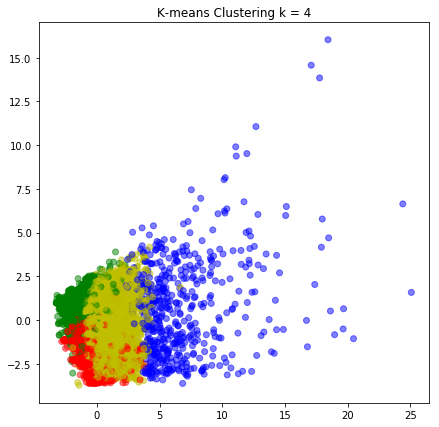

In [12]:
kmeans = KMeans(n_clusters=4)
X_clustered = kmeans.fit_predict(X_std)
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (7,7))
plt.title("K-means Clustering k = 4")
plt.scatter(x_25d[:,0],x_25d[:,2], c= label_color, alpha=0.5) 
plt.show()

## PCA guided K-means clustering Vs K-means clustering for number of clusters = 4
![](images/4.jpeg)

## Choosing Optimal Number of Clusters i.e., k

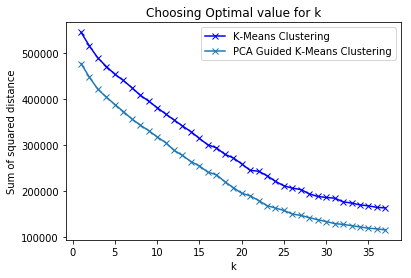

In [13]:
Sum_of_squared_distances = []
K = range(1,38)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_std)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-',label ='K-Means Clustering')
plt.xlabel('k')
plt.ylabel('Sum of squared distance')
plt.title('Choosing Optimal value for k')
m = Sum_of_squared_distances[26]
Sum_of_squared_distances = []
K = range(1,38)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_25d)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'x-',label ='PCA Guided K-Means Clustering')
n = Sum_of_squared_distances[26]
plt.xlabel('k')
plt.ylabel('Sum of squared distance')
plt.title('Choosing Optimal value for k')
plt.legend(loc="best")
plt.show()

## If we change Number of PC's to 32

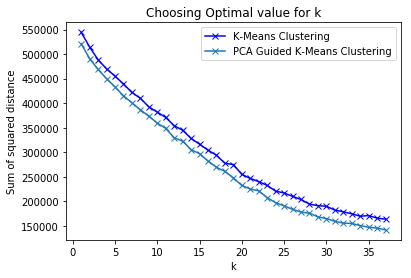

In [14]:
pca = PCA(n_components=32)
x_25d = pca.fit_transform(X_std)
x_25d.shape
Sum_of_squared_distances = []
K = range(1,38)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_std)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-',label ='K-Means Clustering')
plt.xlabel('k')
plt.ylabel('Sum of squared distance')
plt.title('Choosing Optimal value for k')
m = Sum_of_squared_distances[26]
Sum_of_squared_distances = []
K = range(1,38)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_25d)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'x-',label ='PCA Guided K-Means Clustering')
n = Sum_of_squared_distances[26]
plt.xlabel('k')
plt.ylabel('Sum of squared distance')
plt.title('Choosing Optimal value for k')
plt.legend(loc="best")
plt.show()

## Choosing optimal k  PCA guided K-means clustering vs K-means clustering for different principal components

![](images/5.jpeg)

## Conclusion of PCA Guided K-means Vs K-Means clustering

### PCA guided K-means clustering is very useful if number of dimensions in data are very high.

### Advantage : can show approximate results to K-means clustering.

### Proof : paper - "k-means clustering via principal component analysis "

### Used data to simulate : IMDB movie data

## Step 2 :PCA and Linear Auto encoder
### How PCA equivalent to Linear Auto encoder with Squared loss Function ? 



In case of PCA, minimum reconstruction error is defined as : 

$\mathcal{L}(\mathbf{x}, \tilde{\mathbf{x}})=\|\mathbf{x}-\tilde{\mathbf{x}}\|^{2}$

![](images/1.png)


$\mathbf{z}=f(W_1 \mathbf{x}) ; \quad \hat{\mathbf{x}}=g(W_2 \mathbf{z})$


 Squared loss error is given by :
 
 $\min _{\mathbf{W_1}, \mathbf{W_2}} \frac{1}{2 N} \sum_{n=1}^{N}\left\|\mathbf{x}^{(n)}-\hat{\mathbf{x}}^{(n)}\right\|^{2}$


If we Assume functions f and g linear i.e..,

$\min _{\mathbf{W_1}, \mathbf{W_2}} \frac{1}{2 N} \sum_{n=1}^{N}\left\|\mathbf{x}^{(n)}-W_2 W_1 \mathbf{x}^{(n)}\right\|^{2}$

If we Consider in Auto encoder we have

$\tilde{\mathbf{x}}=\mathbf{W}_{2} \mathbf{W}_{1} \mathbf{x}$

Under the Constraint,

$\mathbf{W}_{2} \mathbf{W}_{1} = \mathbf{I}$ 

The above Optimisation problem of Auto encoder is equivalent to PCA.



### Note : Optimal subspace spanned in Auto encoder defined above are equivalent to subspace spanned by Principal Components in PCA
![](images/2.png)

## Note : Principal components weights is not equal to Linear Auto encoder weights. But the Subspace spanned by both Principal component weights and Linear auto encoder will be same.

### How to recover Principal components from Linear auto Encoder weights ?? 


### Idea : It is shown that  first m singular vectors of $W_2$ are the first m principal components of X.


### "From Principal Subspaces to Principal Components with Linear Autoencoders"

In [15]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

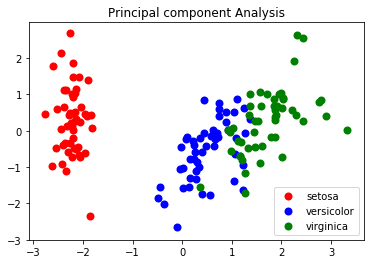

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [18]:
pca = PCA()
pca_transformed = pca.fit_transform(X_scaled)
X = pca_transformed[:,:2]
plt.figure()
colors = ['red', 'blue', 'green']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
      plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw,
                  label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("Principal component Analysis")  
plt.show()
input_dim = X_scaled.shape[1]
encoding_dim = 2  
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                verbose = 0)

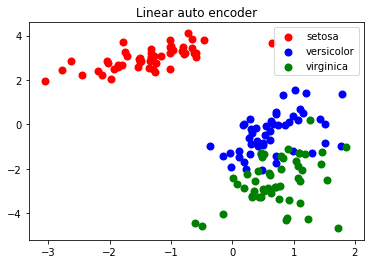

In [19]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(X_scaled)
X = encoded_data[:,:2]
plt.figure()
colors = ['red', 'blue', 'green']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
      plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw,
                  label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("Linear auto encoder")  
plt.show()

### Plot for PCA and Linear auto encoder on IRIS dataset

![](images/6.jpeg)

## Conclusion


### Studied relation between PCA guided K-means clustering vs K-means clustering.
### Studied relation between PCA and auto encoder under constraints.
### Future work : How to retrieve principal components from auto encoder weights ?
#### From Principal Subspaces to Principal Components with Linear Autoencoders
### Future work : How well can non linear auto encoder can perform ?
#### paper : "Reducing the Dimensionality of Data with Neural Networks"